# Классификация изображений рукописных цифр (MNIST)
- - - 

**Импорт библиотек**

In [8]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

2.13.0


**Загрузка данных**

In [9]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

**Предобработка данных**

In [12]:
train_images = train_images/255.0
test_images = test_images/255.0

train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))
 

**Создание модели**

In [13]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10, activation='softmax'))

**Компиляция модели**

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Обучение модели**

In [15]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2025 - accuracy: 0.9397
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0810 - accuracy: 0.9753
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0518 - accuracy: 0.9837
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0361 - accuracy: 0.9881
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0274 - accuracy: 0.9911


**Оценка модели**

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Accuracy = {test_acc}')

313/313 [==============================] - 0s 616us/step - loss: 0.0669 - accuracy: 0.9810
Accuracy = 0.9810000061988831


**Предсказания**

In [17]:
predictions = model.predict(test_images)
print(np.argmax(predictions[0]))

313/313 [==============================] - 0s 529us/step
7


**Отображение картинок**

In [24]:
def plot_predictions(images, labels, predictions, num_images = 5):
    plt.figure(figsize=(25, 25))
    for i in range(num_images):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)
        plt.xlabel(f'Predicted: {np.argmax(predictions[i])}')

    plt.show()

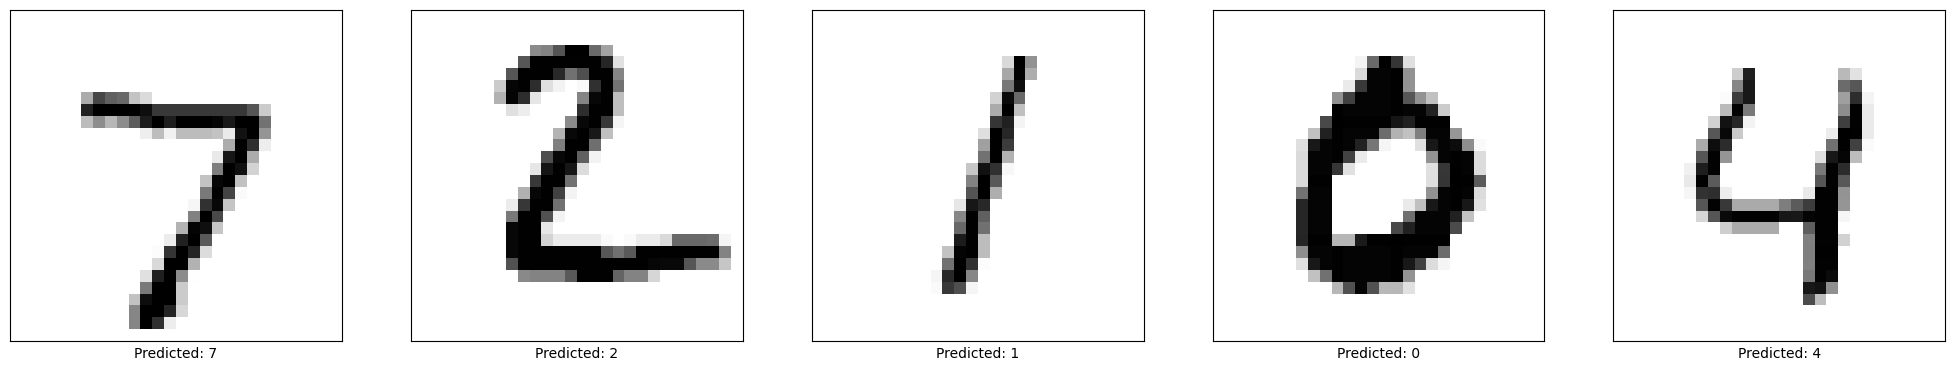

In [25]:
plot_predictions(test_images, test_labels, predictions)

**Пробуем другое количество нейронов**

In [29]:
model_2 = models.Sequential()
model_2.add(layers.Dense(256, activation='relu', input_shape=(28*28,)))
model_2.add(layers.Dense(10, activation='softmax'))
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_2.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model_2.evaluate(test_images, test_labels)
print(f'Accuracy = {test_acc}')

Epoch 1/5
1875/1875 [==============================] - 2s 772us/step - loss: 0.2262 - accuracy: 0.9344
Epoch 2/5
1875/1875 [==============================] - 1s 777us/step - loss: 0.0932 - accuracy: 0.9723
Epoch 3/5
1875/1875 [==============================] - 1s 777us/step - loss: 0.0619 - accuracy: 0.9813
Epoch 4/5
1875/1875 [==============================] - 1s 774us/step - loss: 0.0456 - accuracy: 0.9860
Epoch 5/5
313/313 [==============================] - 0s 454us/step - loss: 0.0661 - accuracy: 0.9795
Accuracy = 0.9794999957084656


**Пробуем другую функцию активации**

In [28]:
model_3 = models.Sequential()
model_3.add(layers.Dense(512, activation='tanh', input_shape=(28*28,)))
model_3.add(layers.Dense(10, activation='softmax'))
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_3.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model_3.evaluate(test_images, test_labels)
print(f'Accuracy = {test_acc}')

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2700 - accuracy: 0.9212
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1235 - accuracy: 0.9634
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0779 - accuracy: 0.9762
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0547 - accuracy: 0.9828
Epoch 5/5
313/313 [==============================] - 0s 585us/step - loss: 0.0727 - accuracy: 0.9770
Accuracy = 0.9769999980926514


**Пробуем SGD вместо adam**

In [30]:
model_4 = models.Sequential()
model_4.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
model_4.add(layers.Dense(10, activation='softmax'))
model_4.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_4.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model_4.evaluate(test_images, test_labels)
print(f'Accuracy = {test_acc}')

Epoch 1/5
1875/1875 [==============================] - 2s 948us/step - loss: 0.6039 - accuracy: 0.8545
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3208 - accuracy: 0.9112
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2729 - accuracy: 0.9241
Epoch 4/5
1875/1875 [==============================] - 2s 978us/step - loss: 0.2423 - accuracy: 0.9323
Epoch 5/5
313/313 [==============================] - 0s 569us/step - loss: 0.2043 - accuracy: 0.9433
Accuracy = 0.9433000087738037


**Модель с Dropout**


In [31]:
model_5 = models.Sequential()
model_5.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
model_5.add(layers.Dropout(0.2))
model_5.add(layers.Dense(10, activation='softmax'))
model_5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_5.fit(train_images, train_labels, epochs=5)
model_5.evaluate(test_images, test_labels)
test_loss, test_acc = model_5.evaluate(test_images, test_labels)
print(f'Accuracy = {test_acc}')

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2196 - accuracy: 0.9354
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0972 - accuracy: 0.9703
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0696 - accuracy: 0.9780
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0543 - accuracy: 0.9827
Epoch 5/5
313/313 [==============================] - 0s 736us/step - loss: 0.0642 - accuracy: 0.9801
Accuracy = 0.9800999760627747


In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_images = scaler.fit_transform(train_images)
test_images = scaler.transform(test_images)

final_model = models.Sequential()
final_model.add(layers.Dense(512, activation='relu', input_shape=(28*28,), kernel_regularizer=tf.keras.regularizers.l2(0.01)))
final_model.add(layers.Dropout(0.5))
final_model.add(layers.Dense(10, activation='softmax'))
final_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
final_model.fit(train_images, train_labels, epochs=5)
final_model.evaluate(test_images, test_labels)
test_loss, test_acc = final_model.evaluate(test_images, test_labels)
print(f'Accuracy = {test_acc}')

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9989 - accuracy: 0.8998
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7030 - accuracy: 0.9127
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7143 - accuracy: 0.9132
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7101 - accuracy: 0.9158
Epoch 5/5
313/313 [==============================] - 0s 631us/step - loss: 0.5950 - accuracy: 0.9429
Accuracy = 0.9429000020027161
